#Modelo de projeção do preço de combústivel (QAV - Querosene de Aviação)

Para observar uma estimativa de Entregas futuras, fizemos um modelo de Regressão para prever o preço do querosene de avição utilizando o modelo ARIMA (Autoregressive Integrated Moving Average Model).

Fontes utilizadas:
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
https://github.com/MatheusRocha0/Demand-Forecasting/blob/main/US_Demand_For_Gasoline_Forecasting.ipynb
https://medium.com/@ozdogar/time-series-forecasting-using-sarima-python-8db28f1d8cfc



In [1]:
# Montando o drive para que possa ter acesso aos arquivos nele contidos
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from random import choice, randint

import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
 #Ignorando alguns erros
 %matplotlib inline
warnings.filterwarnings("ignore")

In [73]:
#Lendo arquivo do drive
#df = pd.read_excel('/content/drive/MyDrive/Embraer/Projection/Querosene.xlsx')

#Lendo arquivo do github
df = pd.read_csv('https://raw.githubusercontent.com/NatashaB-randao/CustoDeTransporte-EmbraerSocialTechCareers/main/Arima%20model%20to%20forecast%20QAV/Querosene.csv', delimiter = ';')
df.head()

,Data,QAV
0,2002-01-01,0.3891
1,2002-01-07,0.3887
2,2002-01-14,0.3892
3,2002-01-21,0.3890
4,2002-01-28,0.3973


In [74]:
df.columns

Index(['Data', 'QAV'], dtype='object')

In [75]:
df["Data"] = pd.to_datetime(df.Data)
df.set_index(df.Data, inplace = True)
df.sort_index(ascending = True, inplace = True)
df.drop("Data", axis = 1, inplace = True)
df.head()

,QAV
Data,
2002-01-01,0.3891
2002-01-07,0.3887
2002-01-14,0.3892
2002-01-21,0.3890
2002-01-28,0.3973


In [76]:
print("""How much missing values are there in each variable?
Variable | Missing values""")
df.isnull().sum()

How much missing values are there in each variable?
Variable | Missing values


QAV    0
dtype: int64

In [77]:
print("Number of rows:", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows: 1148
Number of columns:  1


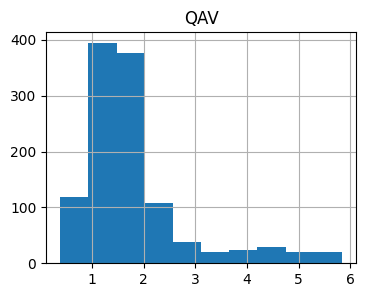

In [78]:
#Histograma do valor do  QAV
df.hist(figsize = (4, 3))
plt.show()

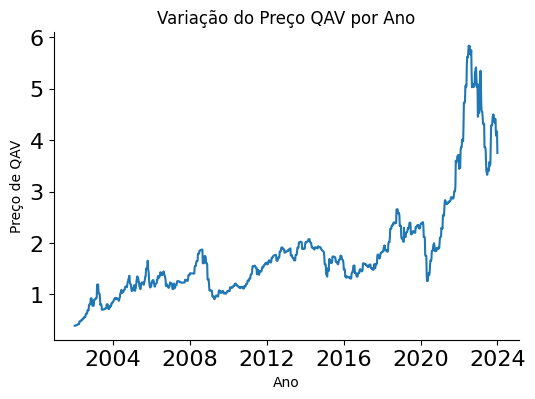

In [79]:
#Plot dos valores de QAV pelos anos considerados (2002-2024)

plt.figure(figsize = (6, 4))
ax = plt.subplot(111)
ax.plot(df.index, df.QAV)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.title("Variação do Preço QAV por Ano")
plt.xlabel('Ano')
plt.ylabel('Preço de QAV')
plt.show()

In [80]:
#Descritivo dos valores contidos na base de dados
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
QAV,1148.0,1.812589,1.031837,0.3887,1.189275,1.5654,1.959975,5.8386


In [81]:
 #Função que encontra melhor parâmetro para ser utilizado no ARIMA
def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [96]:
#Testando parâmetros
params = [
(2, 1, 1),
(3, 1, 1),
(4, 1, 1),
(5, 1, 1),
(2, 1, 2),
(3, 1, 2),
(4, 1, 3),
(5, 1, 3),
(1, 1, 4),
(2, 1, 4),
(3, 1, 4),
(4, 1, 4),
(5, 1, 4),
(1, 2, 3),
(1, 3, 4),
(4, 3, 2),
(1, 1, 1),
(5, 1, 0),
(2, 2, 1),
(2, 2, 0),
(2, 1, 0),
(1, 1, 0)
]

for param in params:
  try:
    model = ARIMA(df.QAV, order = param).fit()
    acc = mape(df.QAV, model.predict(typ = "levels"))
    print("Order: ", param, "MAPE:", acc)
  except:
    pass

Order:  (2, 1, 1) MAPE: 1.8754913233140522
Order:  (3, 1, 1) MAPE: 1.8764527818468422
Order:  (4, 1, 1) MAPE: 1.8815689304720058
Order:  (5, 1, 1) MAPE: 1.8857978172403336
Order:  (2, 1, 2) MAPE: 1.9353794892809635
Order:  (3, 1, 2) MAPE: 1.985225026844662
Order:  (4, 1, 3) MAPE: 1.8842843027475138
Order:  (5, 1, 3) MAPE: 1.8788475528225113
Order:  (1, 1, 4) MAPE: 1.880136741864544
Order:  (2, 1, 4) MAPE: 1.8866812802031538
Order:  (3, 1, 4) MAPE: 1.9168143491681606
Order:  (4, 1, 4) MAPE: 1.9195540654059156
Order:  (5, 1, 4) MAPE: 1.9015218352612737
Order:  (1, 2, 3) MAPE: 1.9649589493232498
Order:  (1, 3, 4) MAPE: 2.0290351105972433
Order:  (4, 3, 2) MAPE: 2.365240199538919
Order:  (1, 1, 1) MAPE: 1.8690862586699508
Order:  (5, 1, 0) MAPE: 1.8816751177200453
Order:  (2, 2, 1) MAPE: 1.937253793021106
Order:  (2, 2, 0) MAPE: 2.593643487475071
Order:  (2, 1, 0) MAPE: 1.8756590312087429
Order:  (1, 1, 0) MAPE: 1.8595036412667396


In [97]:
#Parâmetro escolhido
model = ARIMA(df.QAV, order = (5, 1, 0)).fit()
acc = mape(df.QAV, model.predict(typ = "levels"))
print("Mean Absolute Percentage Error: ", acc)

Mean Absolute Percentage Error:  1.8595036412667396


#ARIMA

In [136]:
# Carregando Dataset

series = pd.read_csv('https://raw.githubusercontent.com/NatashaB-randao/CustoDeTransporte-EmbraerSocialTechCareers/main/Arima%20model%20to%20forecast%20QAV/Querosene.csv',
                     delimiter = ';', parse_dates=[0], index_col=0, squeeze=True)
series.index = series.index.to_period('M')

In [137]:
# Visualização dos dados como index
series.index

PeriodIndex(['2002-01', '2002-01', '2002-01', '2002-01', '2002-01', '2002-02',
             '2002-02', '2002-02', '2002-02', '2002-03',
             ...
             '2023-10', '2023-11', '2023-11', '2023-11', '2023-11', '2023-12',
             '2023-12', '2023-12', '2023-12', '2024-01'],
            dtype='period[M]', name='Data', length=1148)

In [138]:
# fit model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

# Sumário do fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    QAV   No. Observations:                 1148
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1458.755
Date:                Wed, 17 Jan 2024   AIC                          -2905.510
Time:                        19:08:06   BIC                          -2875.240
Sample:                             0   HQIC                         -2894.082
                               - 1148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2125      0.016     13.180      0.000       0.181       0.244
ar.L2         -0.0496      0.036     -1.380      0.168      -0.120       0.021
ar.L3         -0.0284      0.033     -0.867      0.3

In [139]:
# Avialiando o modelo ARIMA usando validação walk-forward
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Dividindo bases entre treino e teste
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
y = series.index
data_train, data_test = y[0:size], y[size:len(X)]
history = [x for x in train]
predictions = list()

In [140]:
data_test

PeriodIndex(['2016-07', '2016-07', '2016-07', '2016-08', '2016-08', '2016-08',
             '2016-08', '2016-08', '2016-09', '2016-09',
             ...
             '2023-10', '2023-11', '2023-11', '2023-11', '2023-11', '2023-12',
             '2023-12', '2023-12', '2023-12', '2024-01'],
            dtype='period[M]', name='Data', length=391)

In [141]:
# Validação walk-forward
for t in range(len(test)):
 model = ARIMA(history, order=(5, 1, 0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.568837, expected=1.557800
predicted=1.558575, expected=1.560000
predicted=1.568313, expected=1.559000
predicted=1.568917, expected=1.415400
predicted=1.396821, expected=1.422300
predicted=1.425694, expected=1.414400
predicted=1.410122, expected=1.413900
predicted=1.399832, expected=1.374200
predicted=1.362680, expected=1.344100
predicted=1.339749, expected=1.345700
predicted=1.345137, expected=1.343700
predicted=1.338725, expected=1.378600
predicted=1.378902, expected=1.411900
predicted=1.415077, expected=1.420000
predicted=1.421290, expected=1.419000
predicted=1.422779, expected=1.414500
predicted=1.418891, expected=1.477500
predicted=1.489156, expected=1.485500
predicted=1.485987, expected=1.487200
predicted=1.488067, expected=1.482500
predicted=1.488084, expected=1.465800
predicted=1.467183, expected=1.455300
predicted=1.454435, expected=1.445700
predicted=1.443721, expected=1.453500
predicted=1.452697, expected=1.480800
predicted=1.482717, expected=1.602100
predicted=1.

In [142]:
# Avaliando previsões
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.104


In [143]:
np.shape(predictions)

(391,)

In [144]:
test.shape

(391,)

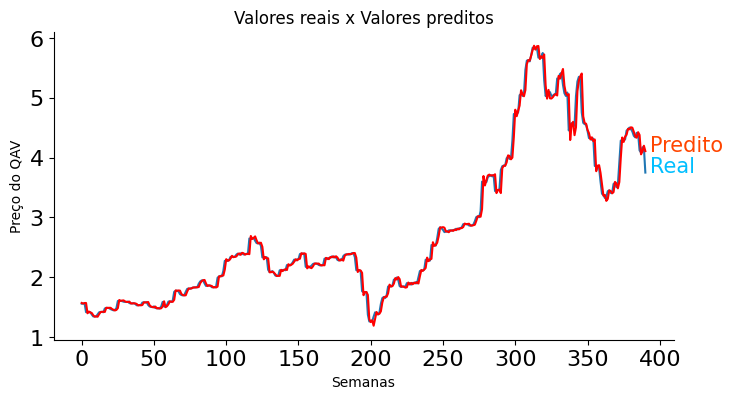

In [145]:
# plot de previsões x valores reais
fig, ax = plt.subplots(figsize = (8, 4))
actual = ax.plot(test)
pred = ax.plot(predictions, color='red')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)

plt.text(s = "Real", x = test.shape[0] + 2, y = test[-1], color = "deepskyblue", fontsize = 15)
plt.text(s = "Predito", x = np.shape(predictions)[0] +2, y = predictions[-1], color = "orangered", fontsize = 15)
plt.title('Valores reais x Valores preditos')
plt.xlabel('Semanas')
plt.ylabel('Preço do QAV')

plt.show()


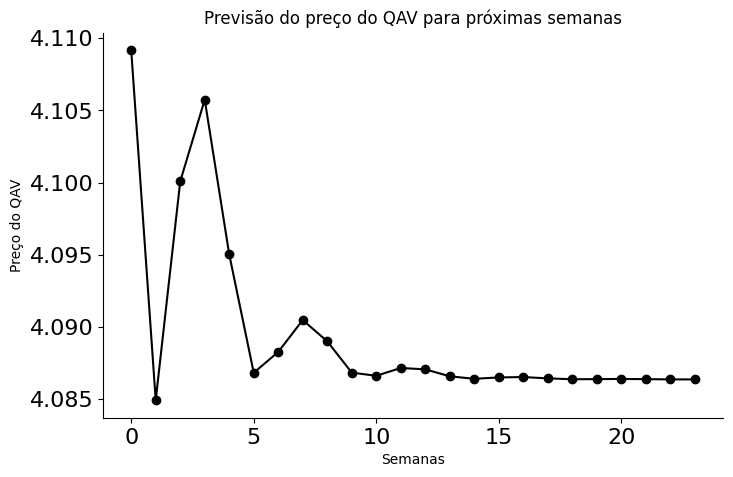

In [146]:
# plot do modelo para prever futuros preços
forecasting = model_fit.forecast(24)

plt.figure(figsize = (8, 5))
ax = plt.subplot(111)
ax.plot(forecasting, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)

plt.title('Previsão do preço do QAV para próximas semanas')
plt.xlabel('Semanas')
plt.ylabel('Preço do QAV')

plt.show()